# Evaluation of a Theano powered HMC Sampler 
In this notebook we want to debug and evaluate the performance of a custom HMC sampler developed with theano, a numeric framework for symbolic computations. This allows for automatic differentiation, which is really helpful for implementing the Hamiltonian Monte Carlo algorithm.

### How it works:
We can create theano symbols on which we can execute Numpy functions. All operations on these theano variables return new theano variables that log the previous operations. This way we can derive a computation graph from complex numpy functions. Through these computation graphs, theano can derive automatic differentiation.

In [37]:
from hmc import *

In [38]:

import plotting

In [39]:
model.c

[array([ 2.14717789,  2.65117453]), array([-4.69439347,  3.51013924])]

In [40]:
M=np.eye(2)/np.var(np.array(model.c).T,1)

In [41]:
M

array([[ 0.08545712,  0.        ],
       [ 0.        ,  5.42137377]])

In [43]:
#pts = test(M=np.eye(2)/15,L=15,n=20000)
pts=test(M=M,L=20, theta=[0,0],n=100000)

ratio: 0.885370
means: [ 2.11441282  2.62960221]
circle_means: [-1.27360779  3.08065688]
var: [ 2.03262851  1.99906151]


We can see that our Theano developed framework, without any optimizations, generates 10^5 samples in less than one minute. This is astonishing. A pure python implementation of 

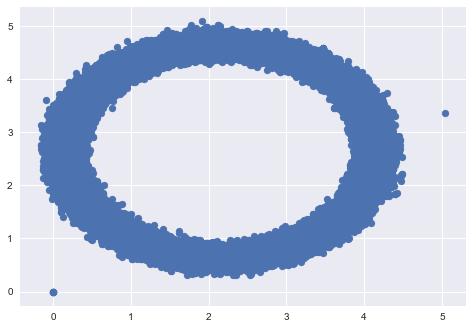

In [44]:
plotting.plot_2d(pts[:,0],pts[:,1])

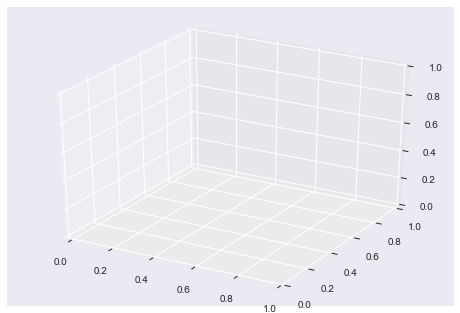

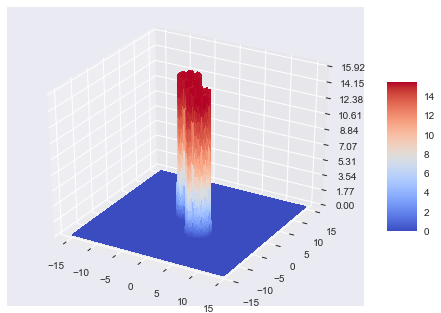

In [63]:
plotting.plotfun(model.L_gs,[-15,-15],[15,15])

We can see that HMC is not that good when it comes to multimodal distributions

In [7]:
pts[:,0]

array([ 0.1425499 ,  0.16037986,  0.18209382,  0.17254655,  0.16150204,
        0.15181374,  0.16702039,  0.16670423,  0.17746837,  0.18630401,
        0.17176348,  0.17615789,  0.17821124,  0.1716578 ,  0.17481706,
        0.17228903,  0.18890074,  0.19165951,  0.19729868,  0.20662265,
        0.2062863 ,  0.17947219,  0.19064889,  0.20013202,  0.21282772,
        0.20759583,  0.20495107,  0.18721463,  0.19253767,  0.18747774,
        0.19157184,  0.1844332 ,  0.1817241 ,  0.16382525,  0.147866  ,
        0.1678718 ,  0.18918629,  0.19616676,  0.18835262,  0.20689707,
        0.20459273,  0.21273587,  0.23133524,  0.2166618 ,  0.21515983,
        0.21848616,  0.2240809 ,  0.22638636,  0.21425094,  0.21335186,
        0.21306117,  0.22804904,  0.23122283,  0.2151646 ,  0.2209355 ,
        0.20501645,  0.20927278,  0.22683339,  0.24475491,  0.22564462,
        0.234983  ,  0.21785578,  0.21064498,  0.22820945,  0.22681768,
        0.21813508,  0.23036507,  0.23210079,  0.19649717,  0.17